In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [8]:
df = pd.read_csv('C:/Users/sumit/Documents/ds_salary_proj/salary_data_cleaned.csv')

In [9]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,average_salary,company_text,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,39,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,13,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,58,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,25,1,0,0,0,1


In [10]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [11]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.'in title.lower():
        return 'jr'
    else:
        return 'na'

        

In [12]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)


In [13]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [14]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [15]:
#fix state los Angeles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [16]:
# Job description Length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [17]:
#compeitors count
df['num_comp'] = df['Competitors'].apply(lambda x :len(x.split(',')) if x != '-1' else 0  )

In [18]:
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [19]:
#hourly wage
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis =1)

In [20]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]


,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [21]:
df['company_text'] = df.company_text.apply(lambda x: x.replace('\n',''))

In [22]:
df['company_text']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_text, Length: 742, dtype: object

In [23]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.0,74.719677,128.149596,100.626011,0.557951,49.389488,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.0,30.980593,45.220324,38.855948,0.496965,53.962906,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.0,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.0,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.0,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.0,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,0.0,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<Axes: >

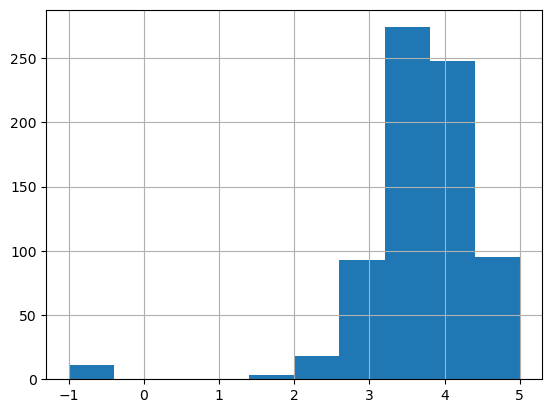

In [24]:
df.Rating.hist()

<Axes: >

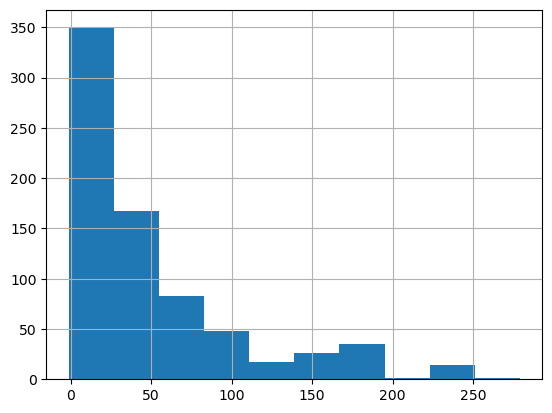

In [25]:
df.age.hist()

<Axes: >

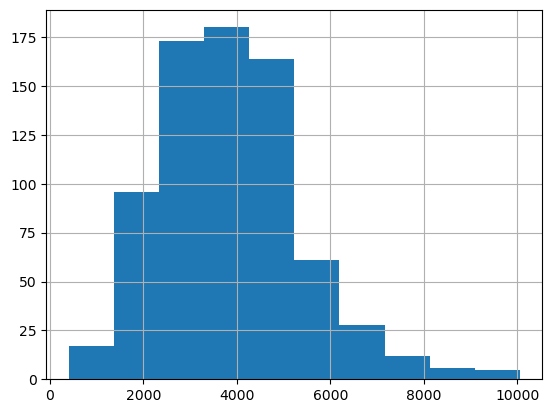

In [26]:
df.desc_len.hist()

<Axes: >

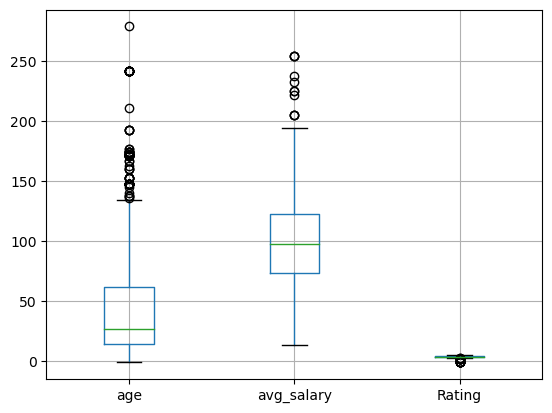

In [27]:
df.rename(columns={'average_salary': 'avg_salary'}, inplace=True)

df.boxplot(column = ['age','avg_salary','Rating'])

In [28]:
df[['age','avg_salary','Rating']].corr()

,age,avg_salary,Rating
age,1.000000,0.019410,0.026164
avg_salary,0.019410,1.000000,0.013492
Rating,0.026164,0.013492,1.000000


<Axes: >

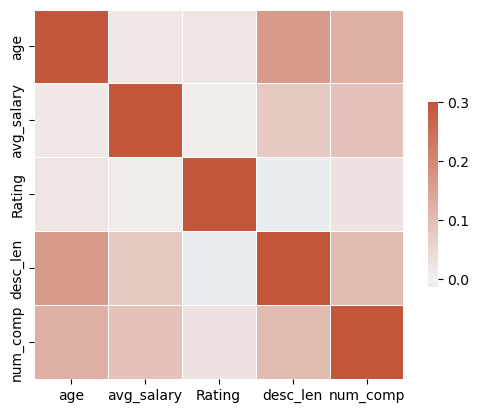

In [29]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(), vmax=.3, center=0,cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
df_cat = df[['Location','Headquarters','Size','Type of ownership','Industry','Sector','Revenue','company_text','job_state','spark','excel','job_simp','seniority']]

graph for Location: total = 200


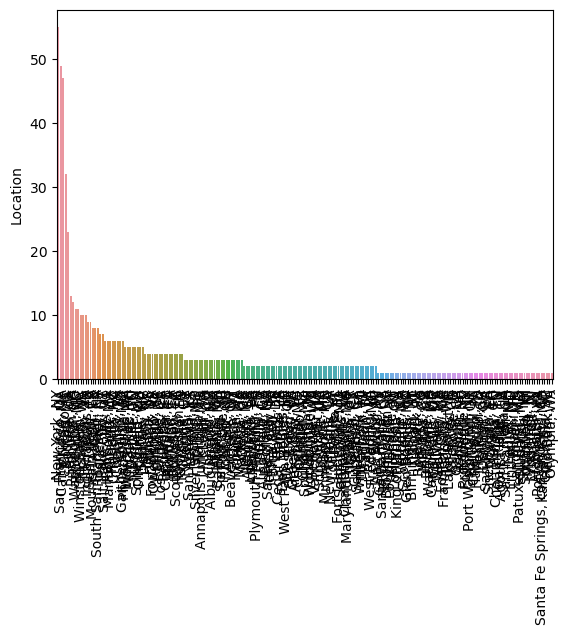

graph for Headquarters: total = 198


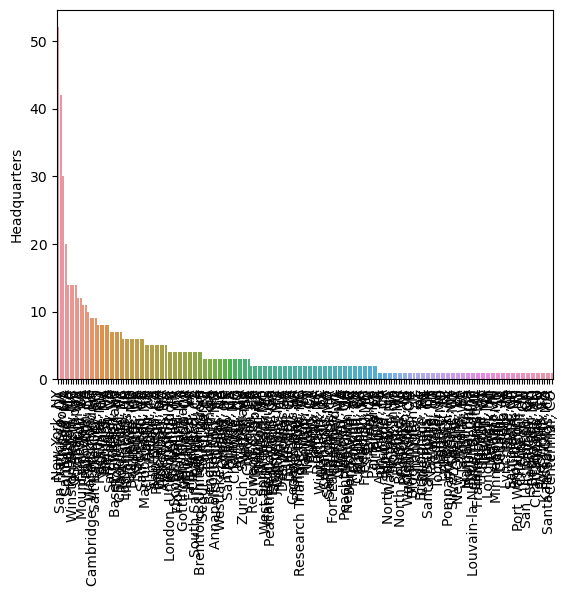

graph for Size: total = 9


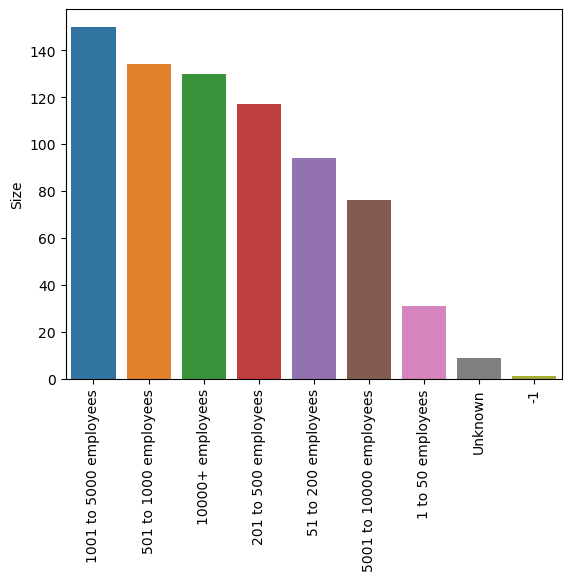

graph for Type of ownership: total = 11


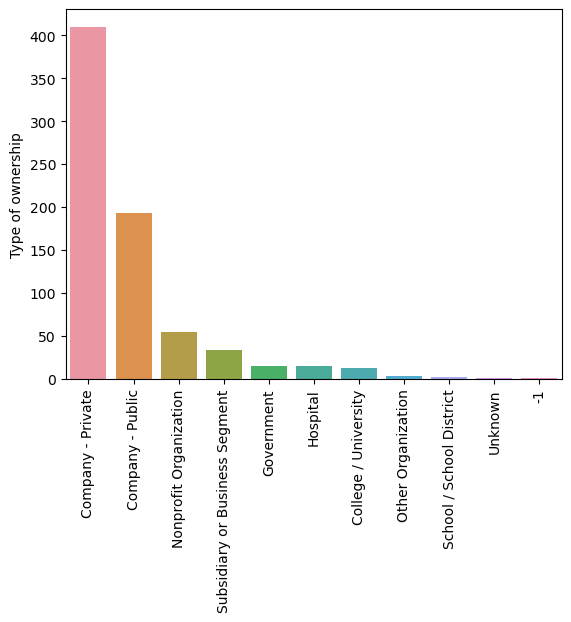

graph for Industry: total = 60


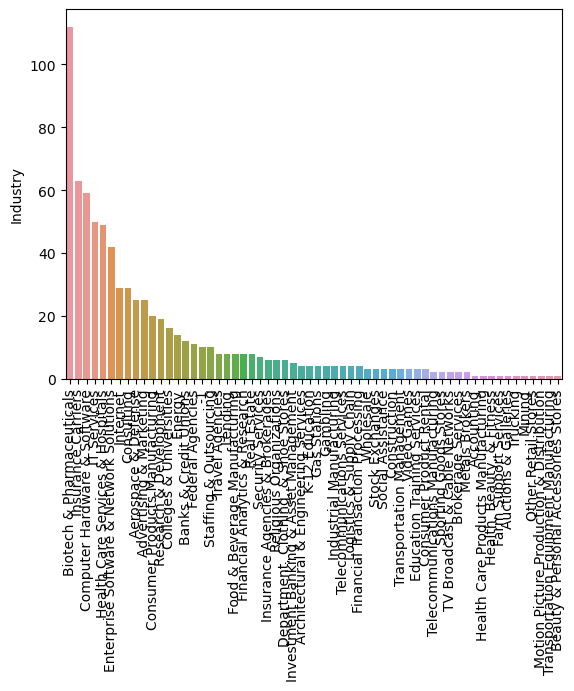

graph for Sector: total = 25


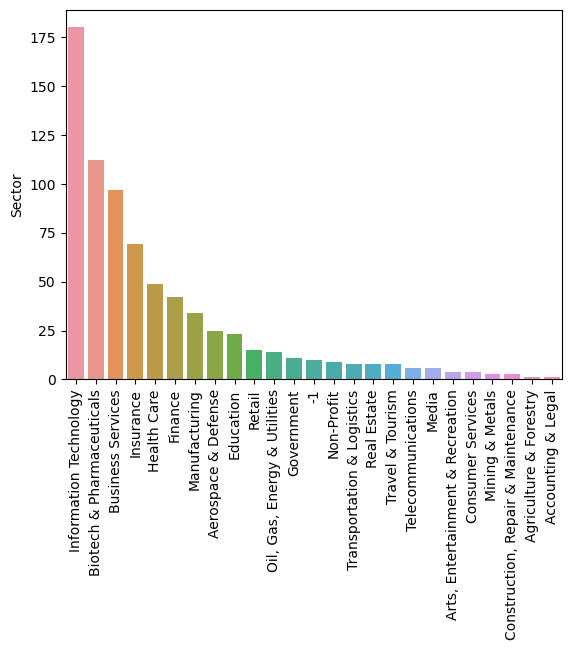

graph for Revenue: total = 14


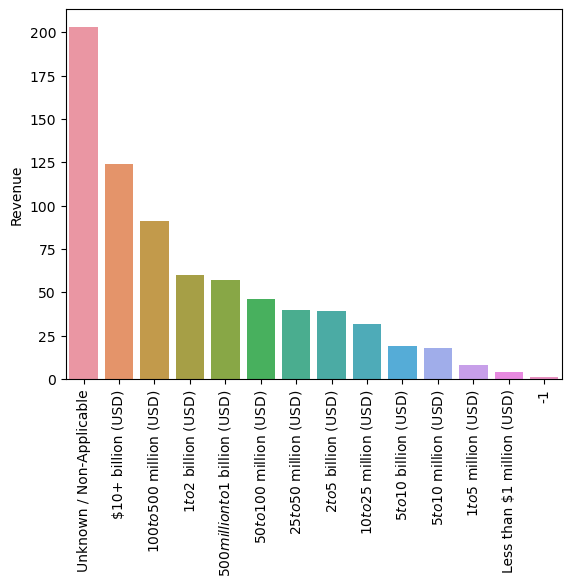

graph for company_text: total = 343


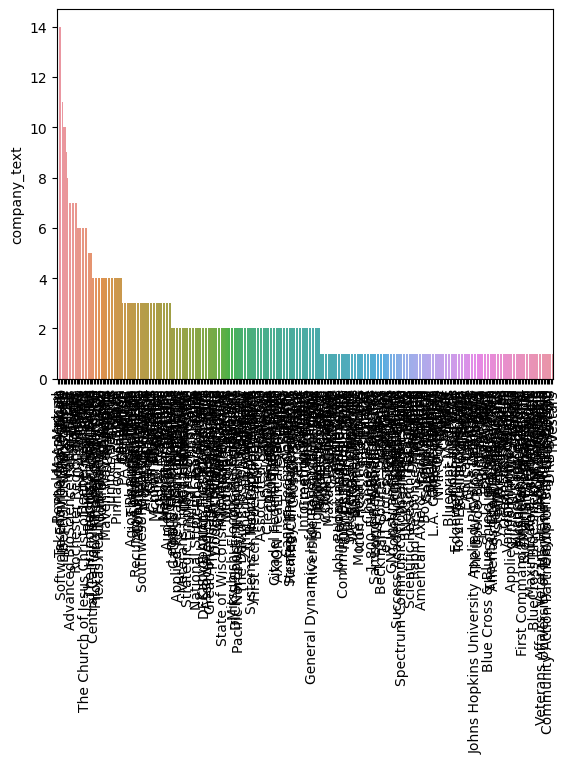

graph for job_state: total = 37


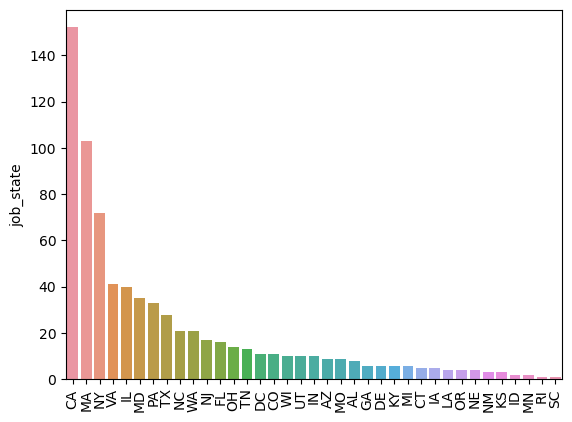

graph for spark: total = 2


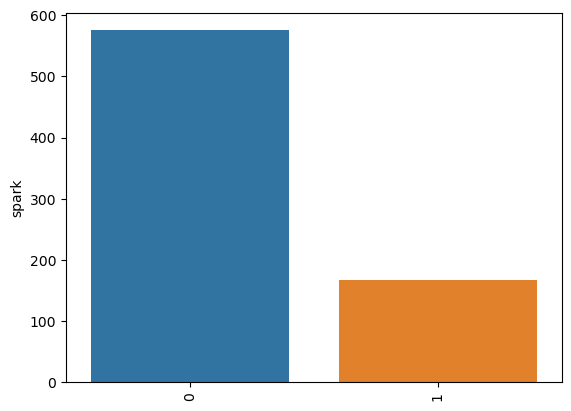

graph for excel: total = 2


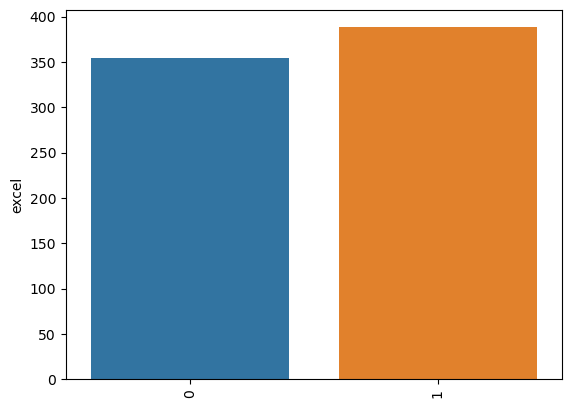

graph for job_simp: total = 7


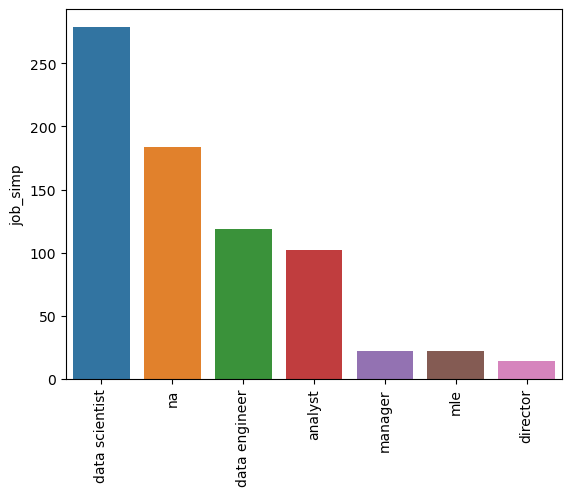

graph for seniority: total = 3


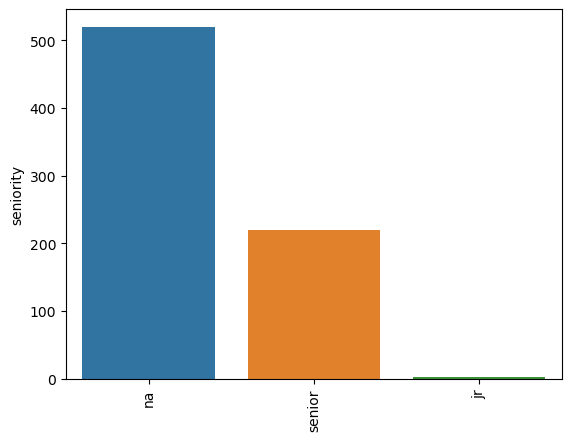

In [34]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()
    

graph for Location: total = 20


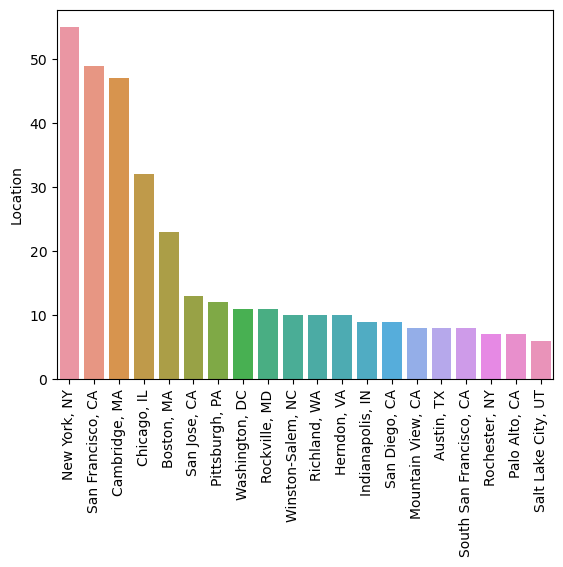

graph for Headquarters: total = 20


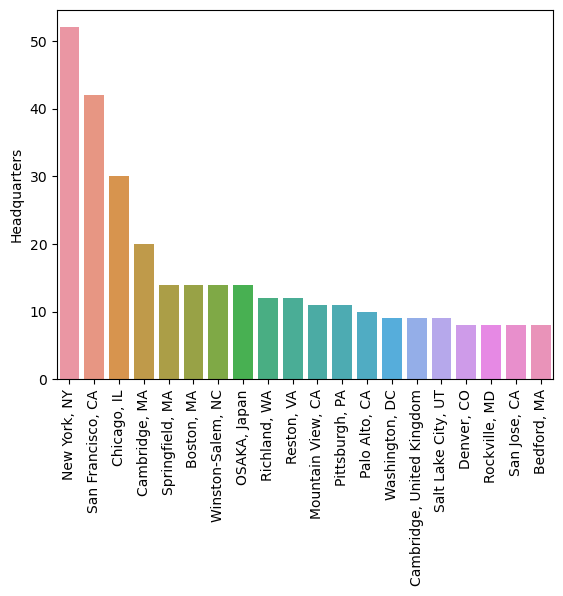

graph for company_text: total = 20


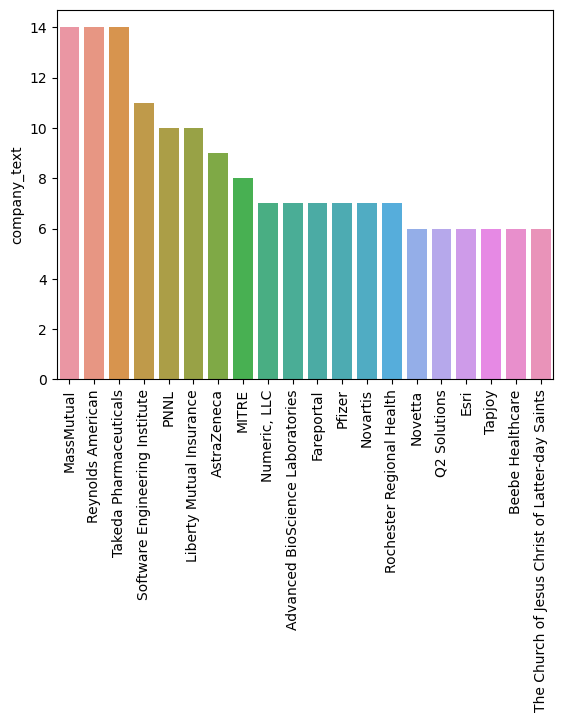

In [38]:
for i in df_cat[['Location','Headquarters','company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [39]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [40]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [41]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [49]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('avg_salary',ascending = False).sort_values('job_state',ascending= False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        mle                      2
          na                       5
          data scientist          18
          analyst                  6
          data engineer           10
UT        analyst                  4
          data engineer            3
          data scientist           3
TX        data scientist          13
          data engineer            8
          na                       7
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        mle                      7
          data scientist           6
          analyst                  8
          na                       8
          manager                  3
          data engineer            1
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        mle                      2
          data engineer            4
          data scientist          40
          analyst                 14
          na                      12
NM        data scientist           3
NJ        data engineer            2
          director                 2
          data scientist           4
          manager                  2
          na                       1
          analyst                  6
NE        na                       4
NC        na                      12
          data engineer            6
          data scientist           3
MO        na                       3
          data scientist           3
          manager                  1
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        data scientist           4
          manager                  2
MD        na                      16
          data engineer            3
          data scientist          13
          analyst                  3
MA        data scientist          30
          na                      46
          director                 6
          data engineer           12
          manager                  5
          analyst                  4
LA        analyst                  1
          na                       1
          data engineer            2
KY        data scientist           2
          na                       4
KS        mle                      3
IN        data scientist           2
          na                       4
          data engineer            4
IL        data engineer            8
          mle                      2
          analyst                  3
          data scientist          15
          director                 6
          na                       6
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        na                       3
          data scientist           3
FL        data engineer            3
          analyst                  6
          data scientist           7
DE        na                       6
DC        analyst                  2
          data engineer            4
          data scientist           5
CT        na                       3
          data scientist           2
CO        na                       3
          data scientist           3
          analyst                  1
          data engineer            3
          mle                      1
CA        na                      27
          data engineer           25
          analyst                 18
          manager                  9
          data scientist          68
          mle                 

In [55]:
#rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r , spark,aws,excel, desc_len, Type of ownership

In [60]:
df_pivots = df[['Rating','Industry','Sector','Revenue','num_comp','hourly','employer_provided','python_yn','R_yn','spark','aws','excel','Type of ownership','avg_salary']]

In [63]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [70]:
!pip install wordcloud

     ------------------------------------ 152.1/152.1 kB 336.1 kB/s eta 0:00:00


In [77]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nltk

nltk.download('all')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizerd
nltk.download('stopwords')

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()